## Import Required Packages

In [13]:
# %reset

%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
import pandas as pd

## Bring in the Data

In [14]:
bank_df = pd.read_csv('UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Preprocessing
1. The "ID" and "ZIP Code" columns are not relevant for model building and therefore should be removed.
2. If a column name has a space, replace the space with an underscore (_)
3. Change the "Education" variable to be type "category". Rename the values (1,2,3) of Education variable to the following:
    1. 1 = "Undergrad"
    2. 2 = "Graduate"
    3. 3 = "Advanced/Professional"
4. Turn the renamed variable to be a dummy variable

In [15]:
# Delete the ID and ZIP code columns
bank_dfv2 = bank_df.drop(columns=['ID', 'ZIP Code'])

# Replace space with underscore in column names
bank_dfv2.columns = bank_dfv2.columns.str.replace(' ', '_')

# Change "Education" column as categorical
bank_dfv2['Education'] = bank_dfv2['Education'].astype('category')

# Rename "Education" values of 1, 2 and 3 to "Undergrad", "Graduate" and "Advanced/ Professional"
new_categories = {1:'Undergrad', 2:'Graduate', 3:'Advanced/Professional'}
bank_dfv2.Education.cat.rename_categories(new_categories, inplace=True)

# Create dummy variables for the categorical data
bank_dfv3 = pd.get_dummies(bank_dfv2, prefix_sep='_', drop_first=True)

## Data Preprocessing
1. Identify dependent and independent variables
2. Standardize the data to negate effect of variable scale (income vs height)
4. Split data into training and testing data
    1. 60% training and 40% testing

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identify dependent and independent variables
y = bank_dfv3['Personal_Loan']
X = bank_dfv3.drop(columns=['Personal_Loan'])

#Standardize independent variables in ALL data (zero mean and unit variance)
std_X = StandardScaler().fit_transform(X)
std_X_df = pd.DataFrame(std_X, columns=X.columns)

# Partition data into training (60%) and testing (40%)
train_X, test_X, train_y, test_y = train_test_split(std_X_df, y, test_size=0.4, random_state=1)

## Modeling "Personal Loans"
1. Fit a decision tree model to the training data
2. Explain the decision tree model with maximum depth of 2
2. Plot The Decision Tree Model

## Explain Decision Tree Model with Max depth of 2
1. DTs have two types of nodes/ variables represented as rectangles: decision nodes and terminal (or leaf) nodes
    1. Decision nodes have successors, but terminal nodes do not
    2. How to decide which variables to split on? 
2. Each node contains the following information:
    1. The name of the variable chosen for splitting and its value (appear at the top)
    2. The number of records (samples) in that node
    3. The distribution of the classes
    4. The majority class of that node
3. The color of the node shows how "pure" the samples are for classification
4. The left leaf node represent records that meet the splitting condition (“True”)
5. The right leaf node represent records that does not meet the splitting condition (“False”)

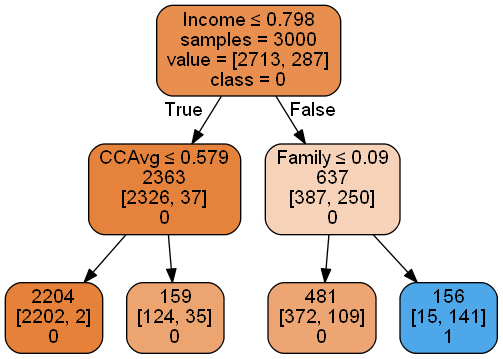

In [23]:
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

# fit decision tree model
dt = DecisionTreeClassifier(random_state=0, max_depth=2)
dt.fit(train_X, train_y)

# Plotting the decision tree model
column_names = train_X.columns
plotDecisionTree(dt, feature_names=column_names, class_names=dt.classes_)

## Interpreting decision trees
1. IF(Income $\leq$ 0.798) AND (CCAvg $\leq$ 0.579) THEN Class = 0
2. IF(Income $\geq$ 0.798) AND (Family $geq$ 0.09) THEN Class = 1

## Deciding which variables to split on
1. Split on a variable that produces "purer" samples
2. Two popular measures of purity/ impurity
    1. Gini index
    2. Enthropy measure

## Modeling "Personal Loans"
1. Fit the kNN model on the training data
    1. The choice of "k" is crucial
    2. KNN is a non-parametric model
2. Fit the discriminant analysis model on the training data
3. Fit the logistic regression model on the training data

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# fit kNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X, train_y)

# fit discriminant analysis model
da = LinearDiscriminantAnalysis()
da.fit(train_X, train_y)

# fit a logistic regression
log = LogisticRegression(fit_intercept=True, C=1e42, solver='liblinear')
log.fit(train_X, train_y)

LogisticRegression(C=1e+42, solver='liblinear')

## Modeling "Personal Loans"
1. For each model get
    1. Class prediction label of the training
    2. Probabilities of belonging to the class of the training and testing data

In [26]:
# Decision Tree class label for training and testing data
dt_pred_train = dt.predict(train_X)
dt_pred_test = dt.predict(test_X)

# kNN class label for training and testing data
knn_pred_train = knn.predict(train_X)
knn_pred_test = knn.predict(test_X)

# discriminant analysis class label for training and testing data
da_pred_train = da.predict(train_X)
da_pred_test = da.predict(test_X)

# Logistic regression class label for training and testing data
log_pred_train = log.predict(train_X)
log_pred_test = log.predict(test_X)

# Summary of training data predictions
pred_summary = pd.DataFrame({"Actual_Class": train_y, "DT_Prediction":dt_pred_train,\
                             "kNN_Prediction":knn_pred_train,\
                             "DA_Prediction":da_pred_train,\
                             "Logistic_Prediction":log_pred_train})

print("Class predictions for training data")
pred_summary.head(10)

Class predictions for training data


,Actual_Class,DT_Prediction,kNN_Prediction,DA_Prediction,Logistic_Prediction
4522,0,0,0,0,0
2851,0,0,0,0,0
2313,0,0,0,0,0
982,0,0,0,0,0
1164,1,0,1,1,1
1779,0,0,0,0,0
2146,0,0,0,0,0
4544,0,0,0,0,0
2363,0,0,0,0,0
1918,1,0,1,1,1


## Modeling "Personal Loans"
1. For each model get
    1. Probabilities of belonging to the class of the training

In [27]:
# Decision Tree class label for training and testing data
dt_prob_train = dt.predict_proba(train_X)
dt_prob_test = dt.predict_proba(test_X)

# kNN class label for training and testing data
knn_prob_train = knn.predict_proba(train_X)
knn_prob_test = knn.predict_proba(test_X)

# discriminant analysis class label for training and testing data
da_prob_train = da.predict_proba(train_X)
da_prob_test = da.predict_proba(test_X)

# discriminant analysis class label for training and testing data
log_prob_train = log.predict_proba(train_X)
log_prob_test = log.predict_proba(test_X)

# Summary of training data predictions
pred_summary = pd.DataFrame({"DT_Probability_P(Y=0)": dt_prob_train[:,0],\
                             "kNN_Probability_P(Y=0)": knn_prob_train[:,0],\
                             "DA_Probability_P(Y=0)":da_prob_train[:,0],\
                             "Logistic_Probability_P(Y=0)":log_prob_train[:,0]})

print("Class predictions for training data")
pred_summary.head()

Class predictions for training data


,DT_Probability_P(Y=0),kNN_Probability_P(Y=0),DA_Probability_P(Y=0),Logistic_Probability_P(Y=0)
0,0.999093,1.0,0.999982,0.999985
1,0.999093,1.0,0.979038,0.943801
2,0.999093,1.0,0.998897,0.996905
3,0.999093,1.0,0.997964,0.994108
4,0.779874,0.0,0.037132,0.198476


## Model Evaluation
1. Provide the model's accuracy rate and comment on it
2. Provide the model's misclassification rate and comment on it

In [30]:
from sklearn.metrics import accuracy_score

# Accuracy rate for knn, LDA and logistic
dt_test_accuracy = accuracy_score(test_y, dt_pred_test)
knn_test_accuracy = accuracy_score(test_y, knn_pred_test)
da_test_accuracy = accuracy_score(test_y, da_pred_test)
log_test_accuracy = accuracy_score(test_y, log_pred_test)

# Get misclassification rate
dt_test_misclass = round(1 - dt_test_accuracy, 4)
knn_test_misclass = round(1 - knn_test_accuracy, 4)
da_test_misclass = round(1 - da_test_accuracy, 4)
log_test_misclass = round(1 - log_test_accuracy, 4)

print("Accuracy rate for decision tree:", dt_test_accuracy)
print("Accuracy rate for knn:", knn_test_accuracy)
print("Accuracy rate for linear discriminant analysis:", da_test_accuracy)
print("Accuracy rate for logistic regression:", log_test_accuracy)

print("\nMisclassification rate for decision tree:", dt_test_misclass)
print("Misclassification rate for kNN:", knn_test_misclass)
print("Misclassification rate for linear discriminant analysis:", da_test_misclass)
print("Misclassification rate for logistic regression:", log_test_misclass)

Accuracy rate for decision tree: 0.9445
Accuracy rate for knn: 0.952
Accuracy rate for linear discriminant analysis: 0.944
Accuracy rate for logistic regression: 0.96

Misclassification rate for decision tree: 0.0555
Misclassification rate for kNN: 0.048
Misclassification rate for linear discriminant analysis: 0.056
Misclassification rate for logistic regression: 0.04


## Model Evaluation
1. Provide the ROC curve and comment on it

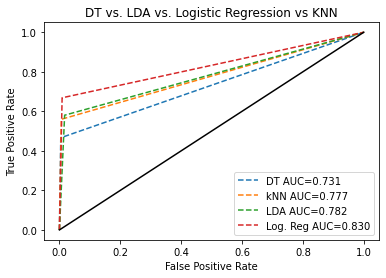

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate AUC for test data
dt_auc_test = roc_auc_score(test_y, dt_pred_test)
knn_auc_test = roc_auc_score(test_y, knn_pred_test)
da_auc_test = roc_auc_score(test_y, da_pred_test)
log_auc_test = roc_auc_score(test_y, log_pred_test)

# calculate fpr and tpr for logistic regression and linear discriminant analysis
dt_fpr_test, dt_tpr_test, _ = roc_curve(test_y, dt_pred_test)
knn_fpr_test, knn_tpr_test, _ = roc_curve(test_y, knn_pred_test)
da_fpr_test, da_tpr_test, _ = roc_curve(test_y, da_pred_test)
log_fpr_test, log_tpr_test, _ = roc_curve(test_y, log_pred_test)

# Plotting
plt.plot(dt_fpr_test, dt_tpr_test, linestyle='--', label="{}{:.3f}".format("DT AUC=", dt_auc_test))
plt.plot(knn_fpr_test, knn_tpr_test, linestyle='--', label="{}{:.3f}".format("kNN AUC=", knn_auc_test))
plt.plot(da_fpr_test, da_tpr_test, linestyle='--', label="{}{:.3f}".format("LDA AUC=", da_auc_test))
plt.plot(log_fpr_test, log_tpr_test, linestyle='--', label="{}{:.3f}".format("Log. Reg AUC=", log_auc_test))
plt.plot([0, 1], [0, 1], linestyle='solid', c='k')

plt.title("DT vs. LDA vs. Logistic Regression vs KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()